In [4]:
import pandas as pd
import numpy as np
import importlib
import processor_weather
import processor_maindata
import processor_spray

importlib.reload(processor_weather)
importlib.reload(processor_maindata)
importlib.reload(processor_spray)
% matplotlib inline

In [12]:
# Load dataset 
train_in = pd.read_csv('./input/train.csv')
test_in = pd.read_csv('./input/test.csv')
weather_in = pd.read_csv('./input/weather.csv')
spray_in = pd.read_csv('./input/spray.csv')
target = 'WnvPresent'


In [13]:
# encode categorical features
train_cat, test_cat = processor_maindata.encode_categorical_features(train_in, test_in, 'Species')
train_cat, test_cat = processor_maindata.encode_trap(train_cat, test_cat)

In [10]:
weather = processor_weather.transform_data(weather_in)

In [22]:
train_in_transformed = processor_maindata.transform_data(train_cat, target=target)
train_in_transformed = processor_maindata.merge_weather(train_in_transformed, weather)
df = train_in_transformed

In [32]:
col = 'AvgSpeed'
bins = np.arange(2,16,2)
x = df.groupby(pd.cut(df[col],bins))[target].mean()
print(x)
x.plot(kind='bar')

Heat
(0, 2]      0.009434
(2, 4]      0.000000
(4, 6]      0.000000
(6, 8]      0.027473
(8, 10]     0.037975
(10, 12]    0.000000
(12, 14]    0.017964
Name: WnvPresent, dtype: float64


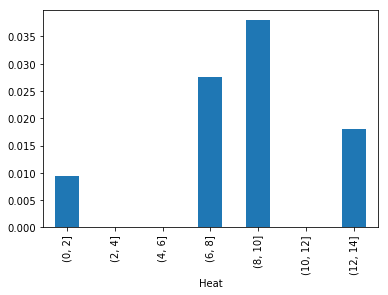

In [44]:
col = 'Heat'
bins = np.arange(0,15,2)
x = df.groupby(pd.cut(df[col],bins))[target].mean()
print(x)
x.plot(kind='bar')

Sunrise
(410, 435]    0.008294
(435, 460]    0.067161
(460, 485]         NaN
(485, 510]    0.159477
(510, 535]    0.082345
Name: WnvPresent, dtype: float64


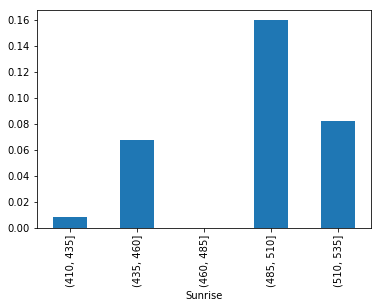

In [38]:
col = 'Sunrise'
bins = np.arange(410,560,25)
x = df.groupby(pd.cut(df[col],bins))[target].mean()
print(x)
x.plot(kind='bar')

Sunset
(1700, 1730]    0.009950
(1730, 1760]    0.022748
(1760, 1790]         NaN
(1790, 1820]    0.099187
(1820, 1850]    0.131619
Name: WnvPresent, dtype: float64


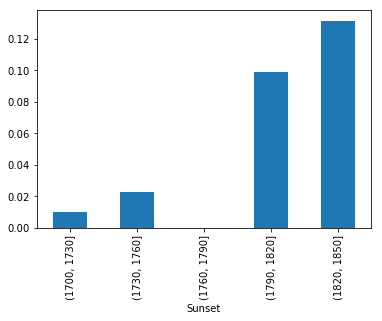

In [42]:
col = 'Sunset'
bins = np.arange(1700,1860,30)
x = df.groupby(pd.cut(df[col],bins))[target].mean()
print(x)
x.plot(kind='bar')

In [32]:
col = 'AvgSpeed'
bins = np.arange(2,16,2)
x = df.groupby(pd.cut(df[col],bins))[target].mean()
print(x)
x.plot(kind='bar')

In [36]:
train_in = pd.read_csv('./input/train.csv')
col = 'Species'
x = train_in.groupby(col)[target].mean()
print(x)


Species
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.088922
CULEX PIPIENS/RESTUANS    0.055135
CULEX RESTUANS            0.017883
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
Name: WnvPresent, dtype: float64
